In [1]:
import torch
import cv2
import PIL.Image as Image
import torchvision.transforms.functional as f

import yaml
import glob
import os
import matplotlib.pyplot as plt
from shutil import copyfile

import archs

In [2]:
export_dir='../../cpp_export'
input_dir='/home/virasoft/workspace/datasets/fat_detection/segmentation/fat_dataset/images'
save_name="fat_detection_unet++.pt"

# export pt file

In [16]:
class args:
    name="fat_dataset_NestedUNet_woDS"

In [17]:

with open('models/%s/config.yml' % args.name, 'r') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

model = archs.__dict__[config['arch']](config['num_classes'],
                                        config['input_channels'],
                                        config['deep_supervision'])

model.load_state_dict(torch.load('models%s/model.pth' %
                                    config['name']))

# sanity check
model.cuda()

NestedUNet(
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (up): Upsample(scale_factor=2.0, mode=bilinear)
  (conv0_0): VGGBlock(
    (relu): ReLU(inplace=True)
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv1_0): VGGBlock(
    (relu): ReLU(inplace=True)
    (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2_0): VGGBlock(
    (relu): ReLU(inplace=True)
    

In [18]:
sample_input=torch.zeros(16,3,512,512).cuda()
traced=torch.jit.trace(model, (sample_input))
torch.jit.save(traced, save_name)

# load and check
model=torch.jit.load(save_name)
model(sample_input)

/home/virasoft/anaconda3/envs/pytorch/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


tensor([[[[-4.3600, -3.2900, -2.8662,  ..., -4.2396, -4.7704, -6.0009],
          [-2.4126, -0.6540, -1.1763,  ..., -5.3503, -6.2832, -7.4505],
          [-1.0252,  1.2924,  2.0755,  ..., -3.9028, -1.6688, -5.4671],
          ...,
          [ 1.0147,  3.0683,  7.3125,  ...,  5.8902,  1.7275, -1.6474],
          [ 1.2524,  2.5365,  4.8563,  ...,  1.9059,  1.4585, -3.8295],
          [-1.9130, -0.8068, -0.5884,  ..., -2.4744, -6.8775, -6.0200]]],


        [[[-4.3600, -3.2900, -2.8662,  ..., -4.2396, -4.7704, -6.0009],
          [-2.4126, -0.6540, -1.1763,  ..., -5.3503, -6.2832, -7.4505],
          [-1.0252,  1.2924,  2.0755,  ..., -3.9028, -1.6688, -5.4671],
          ...,
          [ 1.0147,  3.0683,  7.3125,  ...,  5.8902,  1.7275, -1.6474],
          [ 1.2524,  2.5365,  4.8563,  ...,  1.9059,  1.4585, -3.8295],
          [-1.9130, -0.8068, -0.5884,  ..., -2.4744, -6.8775, -6.0200]]],


        [[[-4.3600, -3.2900, -2.8662,  ..., -4.2396, -4.7704, -6.0009],
          [-2.4126, -0.654

In [20]:
copyfile(
    os.path.join(save_name),
    os.path.join(export_dir, save_name)
)

'../../cpp_export/fat_detection_unet++.pt'

# export samples

In [3]:
no_of_samples=20

In [4]:
img_paths=glob.glob(os.path.join(input_dir, '*.png'))[:no_of_samples]
model=torch.jit.load(save_name)

In [5]:
sample_dir=os.path.join(export_dir, "sample_img")
if not os.path.exists(sample_dir):
    os.makedirs(sample_dir)
    for img in img_paths:
        copyfile(
            os.path.join(img),
            os.path.join(sample_dir, os.path.basename(img))
        )

/home/virasoft/anaconda3/envs/pytorch/lib/python3.8/site-packages/torch/nn/modules/module.py:1051: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return forward_call(*input, **kwargs)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


B-22543-19-HE.svs__21471_26042_512_512.png
(512, 512, 3)


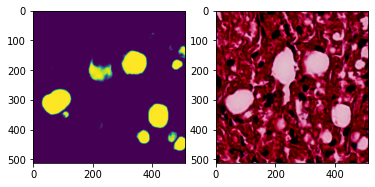

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


B-22543-19-HE.svs__83817_41019_512_512.png
(512, 512, 3)


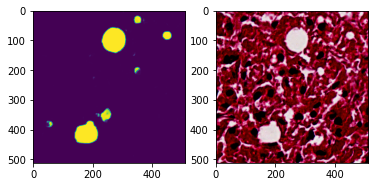

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


B-16840-20-HE.svs__83613_47602_512_512.png
(512, 512, 3)


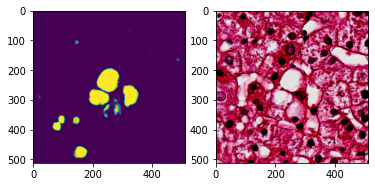

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


B-16840-20-HE.svs__48581_17763_512_512.png
(512, 512, 3)


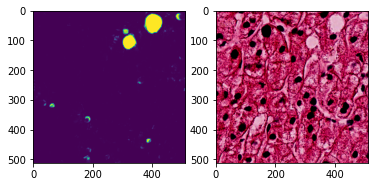

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


B-23512-19-1-HE (2).svs__30348_11109_512_512.png
(512, 512, 3)


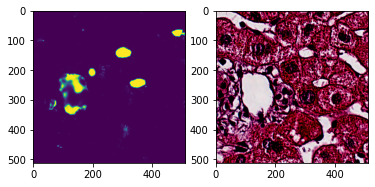

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


B-1880-19-HE.svs__22957_27705_512_512.png
(512, 512, 3)


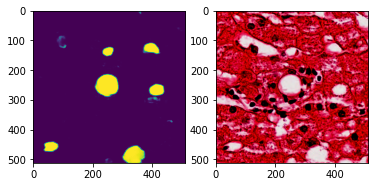

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


B-22543-19-HE.svs__80626_23107_512_512.png
(512, 512, 3)


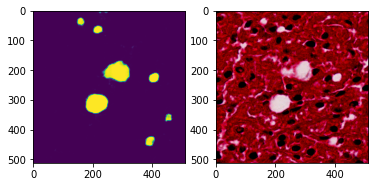

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


B-22543-19-HE.svs__7476_19372_512_512.png
(512, 512, 3)


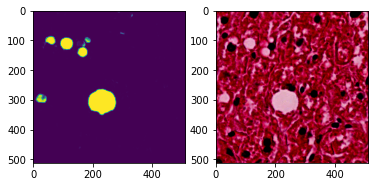

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


B-16840-20-HE.svs__33861_12028_512_512.png
(512, 512, 3)


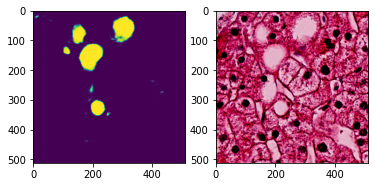

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


B-22543-19-HE.svs__24663_22024_512_512.png
(512, 512, 3)


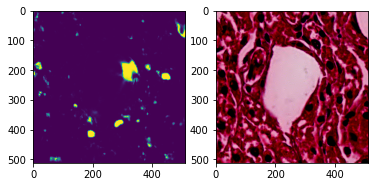

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


B-10046-KONS-11.svs__32968_7522_512_512.png
(512, 512, 3)


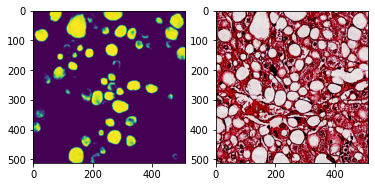

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


B-29680-19-2-HE.svs__87906_62238_512_512.png
(512, 512, 3)


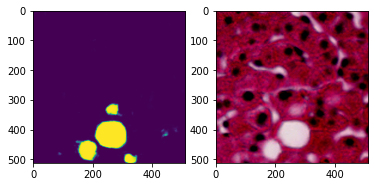

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


B-1880-19-HE.svs__8016_22878_512_512.png
(512, 512, 3)


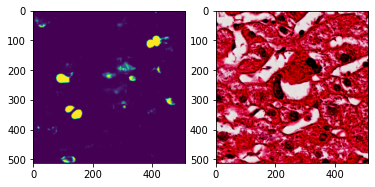

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


B-23512-19-1-HE (2).svs__31769_12125_512_512.png
(512, 512, 3)


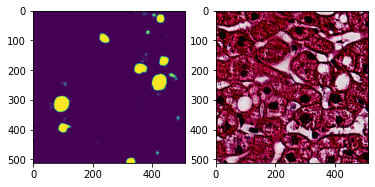

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


B-22543-19-HE.svs__85018_41409_512_512.png
(512, 512, 3)


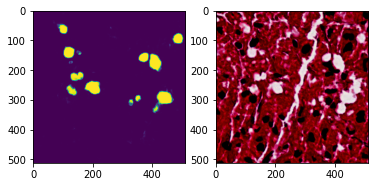

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


B-1438-19-HE-002.svs__51052_49119_512_512.png
(512, 512, 3)


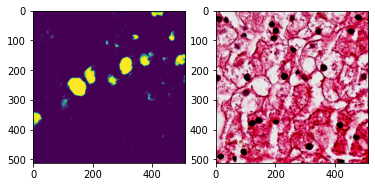

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


B-9110-21-HE (1).svs__8512_5357_512_512.png
(512, 512, 3)


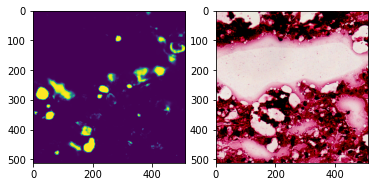

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


B-21781-19-HE.svs__97170_16831_512_512.png
(512, 512, 3)


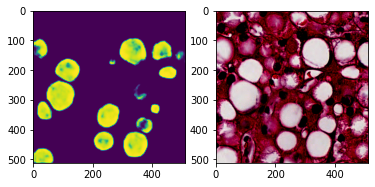

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


B-9110-21-HE (1).svs__5493_7528_512_512.png
(512, 512, 3)


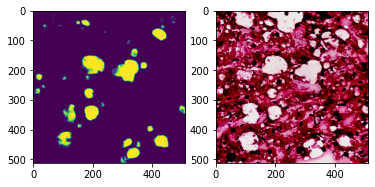

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


B-16840-20-HE.svs__23005_26747_512_512.png
(512, 512, 3)


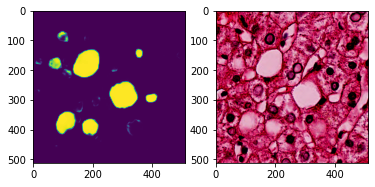

In [6]:

def read_image(path):
    img=cv2.imread(path)
    img=f.to_tensor(img)
    img=f.resize(img, (512,512))
    img=img.unsqueeze(0)
    img=f.normalize(img,mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5])
    return img

def plot_img(img, mask):
    img=img.cpu().detach().squeeze().permute(1,2,0).numpy()
    print(img.shape)
    mask=mask.cpu().detach().numpy().squeeze()
    fig, ax = plt.subplots(1, 2)

    rgb = img[...,::-1].copy()
    ax[0].imshow(mask)
    ax[1].imshow(rgb)
    plt.show()

model.eval()
with torch.no_grad():
    for img_path in img_paths:
        img=read_image(img_path)
        mask=model(img.cuda())

        mask = torch.sigmoid(mask)

        print(os.path.basename(img_path))
        plot_img(img, mask)

# copy this file

In [ ]:
current_path = os.getcwd()
copyfile(
    os.path.join(current_path, 'traceexport.ipynb'),
    os.path.join(export_dir, 'traceexport.ipynb')
)

NameError: name 'export_dir' is not defined